In [1]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable

In [2]:
df = pd.read_pickle('marketdata.pkl')

In [3]:
# Quick inspection of what the provided data looks like (recent spot prices)
df.tail()

ticker,USDJPY,USDMXN
date,,
2019-03-04,111.845,19.3194
2019-03-05,111.895,19.2570
2019-03-06,111.725,19.3435
2019-03-07,111.535,19.4915
2019-03-08,111.135,19.5090


In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

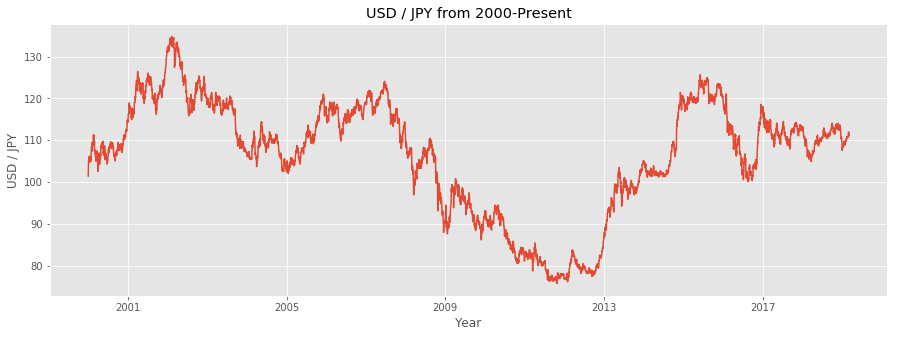

In [5]:
# Cursory plot of JPY
plt.figure(figsize = (15, 5))
plt.plot(df['USDJPY'])
plt.title("USD / JPY from 2000-Present")
plt.xlabel("Year")
plt.ylabel("USD / JPY")
plt.show()

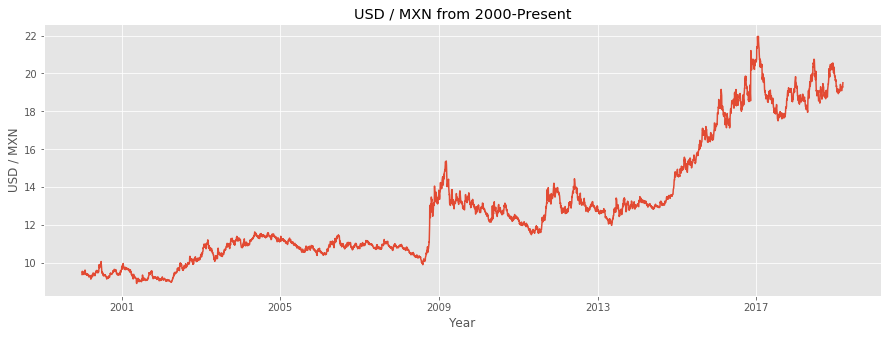

In [6]:
# Cursory plot of MXN
plt.figure(figsize = (15, 5))
plt.plot(df['USDMXN'])
plt.title("USD / MXN from 2000-Present")
plt.xlabel("Year")
plt.ylabel("USD / MXN")
plt.show()

In [7]:
# Compute log change for JPY (instantaneous rate of return)
df['changeJPY'] = np.log(df['USDJPY'] / df['USDJPY'].shift())

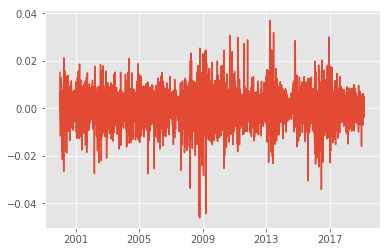

In [8]:
# Cursory plot of log change for JPY reveals noisy data centered around 0
plt.plot(df.changeJPY)

In [9]:
# Compute log change for MXN (instantaneous rate of return)
df['changeMXN'] = np.log(df['USDMXN'] / df['USDMXN'].shift())

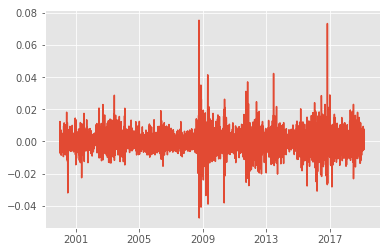

In [10]:
# Cursory plot of log change for MXN reveals noisy data too but surpisingly does not
# appear to be more volatile than JPY
plt.plot(df.changeMXN)

In [11]:
# 5-day and 20-day moving averages for each pair
df['5maJPY'] = df['USDJPY'].rolling(window=5, min_periods=0).mean()
df['20maJPY'] = df['USDJPY'].rolling(window=20, min_periods=0).mean()
df['5maMXN'] = df['USDMXN'].rolling(window=5, min_periods=0).mean()
df['20maMXN'] = df['USDMXN'].rolling(window=20, min_periods=0).mean()
# Inspect recent moving averages
df.tail()

ticker,USDJPY,USDMXN,changeJPY,changeMXN,5maJPY,20maJPY,5maMXN,20maMXN
date,,,,,,,,
2019-03-04,111.845,19.3194,-0.000492,0.001417,111.341,110.65975,19.26360,19.223102
2019-03-05,111.895,19.2570,0.000447,-0.003235,111.571,110.75900,19.27325,19.232727
2019-03-06,111.725,19.3435,-0.001520,0.004482,111.737,110.85425,19.29630,19.244195
2019-03-07,111.535,19.4915,-0.001702,0.007622,111.780,110.94325,19.34069,19.265770
2019-03-08,111.135,19.5090,-0.003593,0.000897,111.627,111.01350,19.38408,19.287732


In [12]:
# The rules:
# Buy JPY against USD if 5-day moving avg is >= 20-day moving avg
df['JPYtxn'] = np.where(df['5maJPY'] >= df['20maJPY'], 'long', 'short')
# Buy MXN against USD if 5-day moving avg is >= 20-day moving avg
df['MXNtxn'] = np.where(df['5maMXN'] >= df['20maMXN'], 'long', 'short')

In [13]:
# Normalize reciprocal currencies so returns can be calculated easier
df['JPYUSD'] = 1 / df['USDJPY']
df['MXNUSD'] = 1 / df['USDMXN']

In [14]:
# Resampled by end of month when portfolio rebalancing will occur
df_grouped = df.resample('M').last()

In [15]:
# Create frames for 2016-2018 selection period
df_2016 = df_grouped['1-2016':'12-2016']
df_2017 = df_grouped['1-2017':'12-2017']
df_2018 = df_grouped['1-2018':'12-2018']
# Inspect 2016
df_2016

ticker,USDJPY,USDMXN,changeJPY,changeMXN,5maJPY,20maJPY,5maMXN,20maMXN,JPYtxn,MXNtxn,JPYUSD,MXNUSD
date,,,,,,,,,,,,
2016-01-31,121.065,18.16775,0.019770,-0.007881,119.101,118.21050,18.39138,18.072697,long,long,0.008260,0.055043
2016-02-29,112.875,18.08700,-0.009259,-0.002728,112.547,114.32525,18.17339,18.474385,short,short,0.008859,0.055288
2016-03-31,112.395,17.13775,-0.000534,-0.002404,112.831,112.81375,17.38960,17.607877,long,short,0.008897,0.058351
2016-04-30,106.995,17.12925,-0.014521,-0.003613,109.785,109.43775,17.35398,17.496935,long,short,0.009346,0.058380
2016-05-31,110.905,18.40315,-0.001532,-0.004189,110.357,109.18325,18.45732,18.232815,long,long,0.009017,0.054339
2016-06-30,102.590,18.44925,-0.000536,-0.004529,102.376,104.94150,18.78465,18.661507,short,long,0.009748,0.054203
2016-07-31,102.485,18.73675,-0.022671,-0.008577,104.740,104.20500,18.81721,18.617845,long,long,0.009758,0.053371
2016-08-31,103.435,18.86875,0.006304,0.003132,101.881,101.17050,18.58494,18.407302,long,long,0.009668,0.052998
2016-09-30,101.265,19.35350,-0.003647,-0.002335,100.872,101.66675,19.53705,19.260370,short,long,0.009875,0.051670


In [16]:
# Calc results of rules-based strategy: looping through dataframe is not bad idea since we are
# dealing with 3 small frames only (i.e., 2016-2018)
def calc_results(df, txn=None, cur=None):
    long, short = [], []
    for index, row in df.iterrows():
        if getattr(row, txn) == 'long':
            long.append(getattr(row, cur))
        else:
            short.append(getattr(row, cur))
    avg_long, avg_short = np.mean(long), np.mean(short)
    avg_return = format(((avg_short / avg_long) - 1) * 100, '.2f')
    avg_long_reciprocal, avg_short_reciprocal = format(1 / avg_long, '.3f'), format(1 / avg_short, '.3f')
    return avg_long_reciprocal, avg_short_reciprocal, avg_return

In [17]:
# Get USD/JPY results
JPY_long_16, JPY_short_16, JPY_return_16 = calc_results(df_2016, 'JPYtxn', 'JPYUSD')
JPY_long_17, JPY_short_17, JPY_return_17 = calc_results(df_2017, 'JPYtxn', 'JPYUSD')
JPY_long_18, JPY_short_18, JPY_return_18 = calc_results(df_2018, 'JPYtxn', 'JPYUSD')

In [18]:
# Get USD/MXN results
MXN_long_16, MXN_short_16, MXN_return_16 = calc_results(df_2016, 'MXNtxn', 'MXNUSD')
MXN_long_17, MXN_short_17, MXN_return_17 = calc_results(df_2017, 'MXNtxn', 'MXNUSD')
MXN_long_18, MXN_short_18, MXN_return_18 = calc_results(df_2018, 'MXNtxn', 'MXNUSD')

In [19]:
# Calc total returns
total_return_16 = format(float(JPY_return_16) + float(MXN_return_16), '.2f')
total_return_17 = format(float(JPY_return_17) + float(MXN_return_17), '.2f')
total_return_18 = format(float(JPY_return_18) + float(MXN_return_18), '.2f')

In [20]:
# Summarize results in table
def results_table(titlename=None, cur=None):
    table = PrettyTable()
    setattr(table, 'title', titlename)
    table.field_names = ["Year", "Avg. Long", "Avg. Short", "Avg. Return"]
    table.add_row(['2016', globals()[cur+"_long_16"], globals()[cur+"_short_16"], globals()[cur+"_return_16"]])
    table.add_row(['2017', globals()[cur+"_long_17"], globals()[cur+"_short_17"], globals()[cur+"_return_17"]])
    table.add_row(['2018', globals()[cur+"_long_18"], globals()[cur+"_short_18"], globals()[cur+"_return_18"]])
    return table

In [21]:
# Summarize aggregate returns of each pair
def returns_table():
    table = PrettyTable()
    table.title = "Aggregate returns"
    table.field_names = ["Year", "Avg. Total Return"]
    table.add_row(['2016', total_return_16])
    table.add_row(['2017', total_return_17])
    table.add_row(['2018', total_return_18])
    return table

In [22]:
# Output summary of results
def output_results():
    jpy_title = "Results for (5, 20) USD/JPY momentum strategy"
    mxn_title = "Results for (5, 20) USD/MXN momentum strategy"
    print(results_table(jpy_title, "JPY"))
    print(results_table(mxn_title, "MXN"))
    print(returns_table())

In [23]:
output_results()

+------+-----------+------------+-------------+
| Year | Avg. Long | Avg. Short | Avg. Return |
+------+-----------+------------+-------------+
| 2016 |  110.009  |  105.330   |     4.44    |
| 2017 |  112.531  |  111.270   |     1.13    |
| 2018 |  111.618  |  109.291   |     2.13    |
+------+-----------+------------+-------------+
+------+-----------+------------+-------------+
| Year | Avg. Long | Avg. Short | Avg. Return |
+------+-----------+------------+-------------+
| 2016 |   19.093  |   17.763   |     7.49    |
| 2017 |   18.944  |   18.784   |     0.85    |
| 2018 |   19.541  |   18.908   |     3.35    |
+------+-----------+------------+-------------+
+------+-------------------+
| Year | Avg. Total Return |
+------+-------------------+
| 2016 |       11.93       |
| 2017 |        1.98       |
| 2018 |        5.48       |
+------+-------------------+
